# Import des librairies

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import seaborn as sns
import datetime as d
import scipy.stats as st
import statsmodels.api as sm
import statsmodels.formula.api as smf
from statsmodels.formula.api import ols
import monModule as mon

# Import des fichiers

### Import du fichier transactions_final

In [2]:
df = pd.read_csv('data/modified/transactions_final.csv')
df.head()

,id_prod,price,categ,client_id,sex,birth,date,session_id
0,0_1421,19.99,0,c_5152,f,1986,2021-04-17 06:09:37.424812,s_21727
1,0_1421,19.99,0,c_2167,f,1960,2021-11-24 00:28:06.088699,s_124134
2,0_1421,19.99,0,c_2167,f,1960,2022-08-24 00:28:06.088699,s_257560
3,0_1421,19.99,0,c_3060,m,1971,2021-04-06 09:35:05.954975,s_16742
4,0_1421,19.99,0,c_3060,m,1971,2022-03-06 09:35:05.954975,s_175117


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 679332 entries, 0 to 679331
Data columns (total 8 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   id_prod     679332 non-null  object 
 1   price       679332 non-null  float64
 2   categ       679332 non-null  int64  
 3   client_id   679332 non-null  object 
 4   sex         679332 non-null  object 
 5   birth       679332 non-null  int64  
 6   date        679332 non-null  object 
 7   session_id  679332 non-null  object 
dtypes: float64(1), int64(2), object(5)
memory usage: 41.5+ MB


In [4]:
df['date'] = pd.to_datetime(df['date'], format="%Y-%m-%d %H:%M:%S.%f",  errors = 'coerce')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 679332 entries, 0 to 679331
Data columns (total 8 columns):
 #   Column      Non-Null Count   Dtype         
---  ------      --------------   -----         
 0   id_prod     679332 non-null  object        
 1   price       679332 non-null  float64       
 2   categ       679332 non-null  int64         
 3   client_id   679332 non-null  object        
 4   sex         679332 non-null  object        
 5   birth       679332 non-null  int64         
 6   date        679332 non-null  datetime64[ns]
 7   session_id  679332 non-null  object        
dtypes: datetime64[ns](1), float64(1), int64(2), object(4)
memory usage: 41.5+ MB


In [5]:
df['date'].isna().sum()

0

### Import du fichier orders

In [6]:
orders = pd.read_csv('data/modified/orders.csv')
orders.head()

,session_id,client_id,nb_prod,total_price,date
0,s_1,c_329,1,11.99,2021-03-01 00:01:07.843138
1,s_10,c_2218,1,26.99,2021-03-01 00:10:33.163037
2,s_100,c_3854,2,33.72,2021-03-01 04:12:43.572994
3,s_1000,c_1014,4,39.22,2021-03-03 02:49:03.169115
4,s_10000,c_476,3,41.49,2021-03-22 17:46:05.819130


### Import du fichier products

In [7]:
products = pd.read_csv('data/modified/products.csv')
products.head()

,id_prod,price,categ
0,0_1421,19.99,0
1,0_1368,5.13,0
2,0_731,17.99,0
3,1_587,4.99,1
4,0_1507,3.99,0


### Import du fichier customers

In [8]:
customers = pd.read_csv('data/modified/customers.csv')
customers.head()

,client_id,sex,birth
0,c_4410,f,1967
1,c_7839,f,1975
2,c_1699,f,1984
3,c_5961,f,1962
4,c_5320,m,1943


# Etude autour du chiffre d'affaires

## Calcul du chiffre d'affaire total

In [9]:
CA_total = orders.total_price.sum()
print(CA_total)

11856009.400000002


## Evolution du chiffre d'affaires dans le temps

In [10]:
df_time_month = df.resample('m', on='date').sum()
df_time_month.head()

,price,categ,birth
date,,,
2021-03-31,482533.49,11806,56586044
2021-04-30,476253.78,10623,56291346
2021-05-31,493026.03,11461,55962533
2021-06-30,484160.80,12640,53123224
2021-07-31,482876.68,13151,48945808


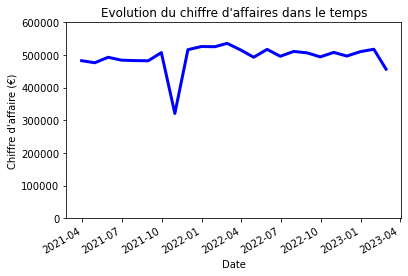

In [11]:
fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(df_time_month.index, df_time_month['price'], color='blue', linewidth=3)
ax.set_ylim(0, 600000)
ax.set(xlabel="Date",
       ylabel="Chiffre d'affaire (€)",
       title="Evolution du chiffre d'affaires dans le temps")
plt.gcf().autofmt_xdate()

## Evolution du chiffre d'affaires dans le temps et par catégorie

In [12]:
df_time_month_categ = df.groupby('categ').resample('m', on='date').sum()
df_time_month_categ.head()

price  categ     birth
categ date                                  
0     2021-03-31  193722.05      0  35884065
      2021-04-30  205366.94      0  38290758
      2021-05-31  196269.28      0  36609322
      2021-06-30  168015.39      0  31460774
      2021-07-31  144792.07      0  26864368

Text(0, 0.5, "Chiffre d'affaires (€)")

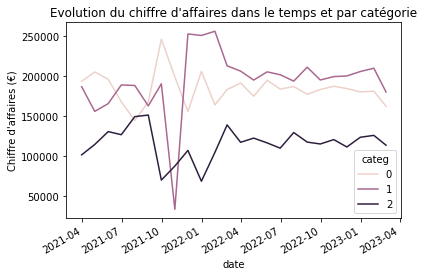

In [13]:
sns.lineplot(x=df_time_month_categ.index.get_level_values('date'), y=df_time_month_categ["price"],
             hue=df_time_month_categ.index.get_level_values('categ'))
plt.gcf().autofmt_xdate()
ax.set_ylim(0, 260000)
plt.title("Evolution du chiffre d'affaires dans le temps et par catégorie")
plt.ylabel("Chiffre d'affaires (€)")

## Evolution du chiffre d'affaires entre 2021-10 et 2022-01 de la catégorie 1

In [14]:
df_categ1 = df[df['categ']==1]
df_categ1 = df_categ1.loc[df["date"]<= d.datetime(2022, 2, 1)]
df_categ1 = df_categ1.loc[df_categ1["date"]>= d.datetime(2021, 9, 1)]
df_categ1.head()

,id_prod,price,categ,client_id,sex,birth,date,session_id
2090,1_587,4.99,1,c_3902,f,1971,2021-09-24 21:46:08.228253,s_94961
2095,1_587,4.99,1,c_2118,m,1990,2021-09-23 10:53:13.630885,s_94220
2104,1_587,4.99,1,c_2900,m,1979,2021-09-26 23:13:05.500727,s_96039
2106,1_587,4.99,1,c_2803,m,1972,2022-01-17 07:50:30.867323,s_151044
2107,1_587,4.99,1,c_2592,f,1992,2021-12-21 15:21:18.022554,s_137763


In [15]:
df_categ1_time_month = df_categ1.resample('w', on='date').sum()
df_categ1_time_month.head(10)

,price,categ,birth
date,,,
2021-09-05,30144.55,1479,2919415
2021-09-12,43000.57,2067,4079694
2021-09-19,45176.99,2195,4333373
2021-09-26,45377.30,2226,4393166
2021-10-03,33918.16,1645,3246828
2021-10-10,0.00,0,0
2021-10-17,0.00,0,0
2021-10-24,0.00,0,0
2021-10-31,26758.53,1322,2610360


(array(18885.), array(19022.))

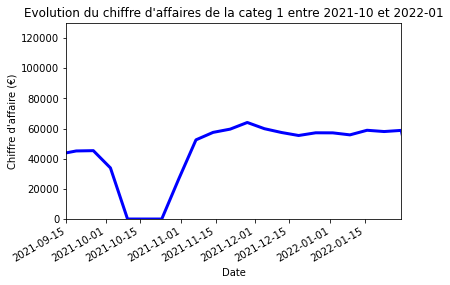

In [16]:
fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(df_categ1_time_month.index, df_categ1_time_month['price'], color='blue', linewidth=3)
ax.set(xlabel="Date",
       ylabel="Chiffre d'affaire (€)",
       title="Evolution du chiffre d'affaires de la categ 1 entre 2021-10 et 2022-01")
plt.gcf().autofmt_xdate()
ax.set_ylim(0, 130000)
ax.set_xlim("2021-09-15","2022-01-30")

## Répartition du chiffre d'affaires par catégorie

In [17]:
df_category = df.groupby(["categ"], as_index=False).agg({'price':'sum'}) 
df_category.head()

,categ,price
0,0,4.422012e+06
1,1,4.653723e+06
2,2,2.780275e+06


Text(0.5, 1.0, 'Répartition du chiffre daffaires par catégorie')

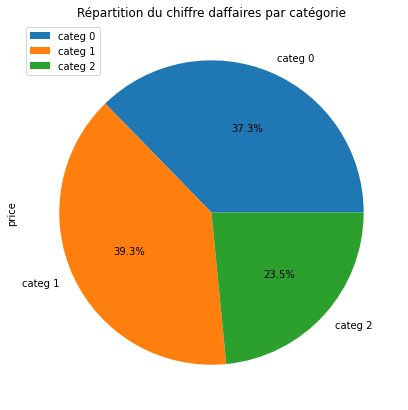

In [18]:
df_category.plot.pie(y='price', figsize=(7, 7),autopct='%1.1f%%',labels=['categ 0','categ 1','categ 2'])
plt.title('Répartition du chiffre d''affaires par catégorie')

## Répartition du chiffre d'affaires par produits

In [19]:
df_lorenz_prod = df.groupby(["id_prod"], as_index=False).agg({'price':'sum'})
df_lorenz_prod = df_lorenz_prod.rename(columns = {'price':'CA_produit', 'id_prod' : 'produit'})
df_lorenz_prod.head()

,produit,CA_produit
0,0_0,4657.50
1,0_1,5352.13
2,0_10,394.90
3,0_100,61.80
4,0_1000,2954.88


In [20]:
print(mon.gini(df_lorenz_prod['CA_produit']))

0.7428361592956256


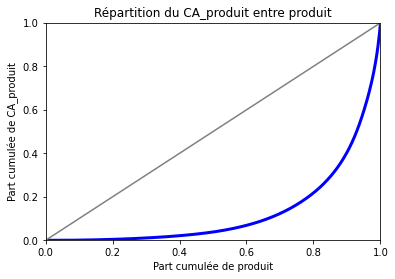

In [21]:
mon.lorenz_curve("produit","CA_produit",df_lorenz_prod)

On constate sur cette courbe de Lorenz que 20% des produits génèrent 80% du chiffre d'affaires

# Variation des prix par catégories

## Catégorie 0

In [22]:
products[products['categ'] == 0].describe()

,price,categ
count,2309.000000,2309.0
mean,11.732183,0.0
std,7.564173,0.0
min,0.620000,0.0
25%,5.590000,0.0
50%,10.320000,0.0
75%,16.650000,0.0
max,40.990000,0.0


## Catégorie 1

In [23]:
products[products['categ'] == 1].describe()

,price,categ
count,739.000000,739.0
mean,25.531421,1.0
std,15.425162,0.0
min,2.000000,1.0
25%,13.390000,1.0
50%,22.990000,1.0
75%,33.990000,1.0
max,80.990000,1.0


## Catégorie 2

In [24]:
products[products['categ'] == 2].describe()

,price,categ
count,239.000000,239.0
mean,108.354686,2.0
std,49.561431,0.0
min,30.990000,2.0
25%,71.065000,2.0
50%,101.990000,2.0
75%,136.530000,2.0
max,300.000000,2.0


Text(0.5, 1.0, 'Variation des prix par catégories')

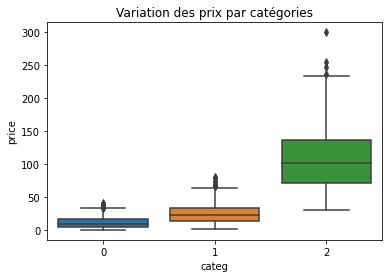

In [25]:
ax = sns.boxplot(x=products["categ"], y=products["price"])
plt.title('Variation des prix par catégories')

# TOP 10 des ventes 

In [26]:
products_revenue = df.groupby(["id_prod"], as_index=False).agg({'price':'sum','session_id':'count'})                       
products_revenue.head()

,id_prod,price,session_id
0,0_0,4657.50,1242
1,0_1,5352.13,487
2,0_10,394.90,22
3,0_100,61.80,3
4,0_1000,2954.88,432


In [27]:
products_revenue = products_revenue.rename(columns = {'price':'product_revenue','session_id':'nb_sales'})
products_revenue.head()

,id_prod,product_revenue,nb_sales
0,0_0,4657.50,1242
1,0_1,5352.13,487
2,0_10,394.90,22
3,0_100,61.80,3
4,0_1000,2954.88,432


### Trier par CA décroissant

In [28]:
products_revenue = products_revenue.sort_values('product_revenue',ascending=False)
products_revenue.head(10)

,id_prod,product_revenue,nb_sales
3097,2_159,94893.50,650
3071,2_135,69334.95,1005
3046,2_112,65407.76,968
3035,2_102,60736.78,1027
3153,2_209,56971.86,814
2620,1_395,54356.25,1875
2592,1_369,54025.48,2252
3044,2_110,53846.25,865
3202,2_39,53060.85,915
3105,2_166,52449.12,228


### Trier par nombre de ventes décroissant

In [29]:
products_revenue = products_revenue.sort_values('nb_sales',ascending=False)
products_revenue.head(10)

,id_prod,product_revenue,nb_sales
2592,1_369,54025.48,2252
2645,1_417,45947.11,2189
2642,1_414,51949.40,2180
2734,1_498,49731.36,2128
2654,1_425,35611.04,2096
2630,1_403,35260.40,1960
2640,1_412,32484.15,1951
2641,1_413,34990.55,1945
2633,1_406,48106.59,1939
2634,1_407,30940.65,1935


# Flop des ventes

### Trier par CA croissant

In [30]:
products_revenue = products_revenue.sort_values('product_revenue',ascending=True)
products_revenue.head(10)

,id_prod,product_revenue,nb_sales
595,0_1539,0.99,1
313,0_1284,1.38,1
719,0_1653,1.98,2
1785,0_541,1.99,1
2080,0_807,1.99,1
665,0_1601,1.99,1
802,0_1728,2.27,1
549,0_1498,2.48,1
2180,0_898,2.54,2
925,0_1840,2.56,2


### Trier par nombre de ventes croissant

In [31]:
products_revenue = products_revenue.sort_values('nb_sales',ascending=True)
products_revenue.head(20)

,id_prod,product_revenue,nb_sales
595,0_1539,0.99,1
3248,2_81,86.99,1
1327,0_2201,20.99,1
3176,2_23,115.99,1
698,0_1633,24.99,1
2167,0_886,21.82,1
166,0_1151,2.99,1
752,0_1683,2.99,1
2109,0_833,2.99,1
1793,0_549,2.99,1


# TOP 10 des livres les plus chers

In [32]:
products_price_revenue = pd.merge(products, products_revenue, on='id_prod',how="left")
products_price_revenue.head()

,id_prod,price,categ,product_revenue,nb_sales
0,0_1421,19.99,0,23008.49,1151.0
1,0_1368,5.13,0,4714.47,919.0
2,0_731,17.99,0,287.84,16.0
3,1_587,4.99,1,593.81,119.0
4,0_1507,3.99,0,2816.94,706.0


In [33]:
products_price_revenue.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3287 entries, 0 to 3286
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id_prod          3287 non-null   object 
 1   price            3287 non-null   float64
 2   categ            3287 non-null   int64  
 3   product_revenue  3266 non-null   float64
 4   nb_sales         3266 non-null   float64
dtypes: float64(3), int64(1), object(1)
memory usage: 154.1+ KB


In [34]:
products_price_revenue = products_price_revenue.sort_values('price',ascending=False)
products_price_revenue.head(10)

,id_prod,price,categ,product_revenue,nb_sales
946,2_2,300.00,2,4500.00,15.0
724,2_76,254.44,2,2289.96,9.0
394,2_158,247.22,2,35105.24,142.0
1435,2_167,236.99,2,44791.11,189.0
2778,2_30,233.54,2,1634.78,7.0
1959,2_125,231.99,2,1623.93,7.0
2486,2_166,230.04,2,52449.12,228.0
785,2_40,228.11,2,5930.86,26.0
10,2_228,225.17,2,16887.75,75.0
1895,2_4,222.97,2,1337.82,6.0


# TOP 10 des livres les moins chers

In [35]:
products_price_revenue = products_price_revenue.sort_values('price',ascending=True)
products_price_revenue.head(10)

,id_prod,price,categ,product_revenue,nb_sales
2271,0_528,0.62,0,5.58,9.0
2354,0_202,0.62,0,5.58,9.0
370,0_120,0.66,0,9.90,15.0
1210,0_1844,0.77,0,3.85,5.0
1529,0_1620,0.80,0,NaN,NaN
2301,0_1364,0.81,0,15.39,19.0
2424,0_612,0.88,0,6.16,7.0
2771,0_902,0.92,0,3.68,4.0
686,0_2138,0.93,0,9.30,10.0
847,0_180,0.97,0,10.67,11.0


## Livres non vendus

In [36]:
products_price_revenue.product_revenue.isnull().sum()

21

In [37]:
products_price_revenue[products_price_revenue['product_revenue'].isnull()]

,id_prod,price,categ,product_revenue,nb_sales
1529,0_1620,0.80,0,NaN,NaN
810,0_1014,1.15,0,NaN,NaN
279,0_1780,1.67,0,NaN,NaN
2214,0_310,1.94,0,NaN,NaN
1504,0_322,2.99,0,NaN,NaN
1346,0_1645,2.99,0,NaN,NaN
793,0_1119,2.99,0,NaN,NaN
736,0_1062,20.08,0,NaN,NaN
3095,0_2308,20.28,0,NaN,NaN
1030,0_1318,20.92,0,NaN,NaN


In [38]:
pourc_livre_non_vendu = (products_price_revenue.product_revenue.isnull().sum()/products.shape[0])*100
print("Le pourcentage de livres non vendus est de {}%".format(pourc_livre_non_vendu))

Le pourcentage de livres non vendus est de 0.6388804380894433%


# Etude sur le profil des clients

## Répartition H/F des clients

In [39]:
df_customers = df.groupby(["sex"], as_index=False).agg({'client_id': pd.Series.nunique})
df_customers.head()

,sex,client_id
0,f,4479
1,m,4121


Text(0.5, 1.0, 'Répartition h/f des clients')

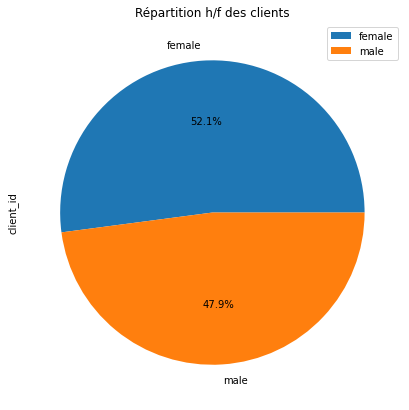

In [40]:
df_customers.plot.pie(y='client_id', figsize=(7, 7),autopct='%1.1f%%',labels=["female","male"])
plt.title('Répartition h/f des clients')

## Répartition des clients par âge

In [41]:
df['age'] = df.date.max().year-df['birth']
df.age.describe()

count    679332.000000
mean         45.188861
std          13.574553
min          19.000000
25%          36.000000
50%          43.000000
75%          53.000000
max          94.000000
Name: age, dtype: float64

In [42]:
df.date.max()

Timestamp('2023-02-28 23:58:30.792755')

In [43]:
df.age.nunique()

76

In [44]:
df_age = df.groupby(["client_id"], as_index=False).agg({"age":"first"})
df_age.head()

,client_id,age
0,c_1,68
1,c_10,67
2,c_100,31
3,c_1000,57
4,c_1001,41


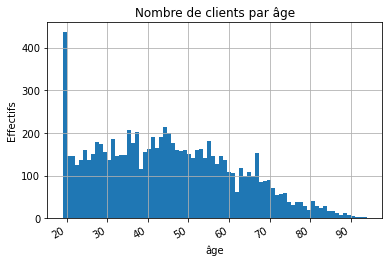

In [45]:
df_age.hist(column='age',bins=76)
plt.title('Nombre de clients par âge')
plt.xlabel('âge')
plt.ylabel('Effectifs')
plt.gcf().autofmt_xdate()

## Répartition du chiffre d'affaires entre les clients

In [46]:
df_lorenz = df.groupby(["client_id"], as_index=False).agg({'price':'sum'}) 
df_lorenz = df_lorenz.rename(columns = {'price':'CA_client', 'client_id' : 'client'})
df_lorenz.head()

,client,CA_client
0,c_1,558.18
1,c_10,1353.60
2,c_100,254.85
3,c_1000,2261.89
4,c_1001,1812.86


In [47]:
print(mon.gini(df_lorenz['CA_client']))

0.4463952178607458


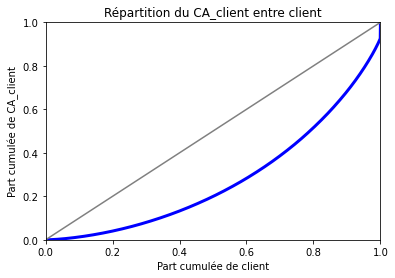

In [48]:
mon.lorenz_curve("client","CA_client",df_lorenz)

Cette courbe de Lorenz nous indique que 10% du chiffre d'affaires de l'entreprise est généré par une petite partie des clients(~1%)

## TOP 10 des clients

In [49]:
orders_customers = orders.groupby(["client_id"], as_index=False).agg({'total_price':'sum'})
orders_customers.head()

,client_id,total_price
0,c_1,558.18
1,c_10,1353.60
2,c_100,254.85
3,c_1000,2261.89
4,c_1001,1812.86


In [50]:
orders_customers = orders_customers.sort_values('total_price',ascending=False)
orders_customers.head(10)

,client_id,total_price
677,c_1609,324033.35
4388,c_4958,289760.34
6337,c_6714,153660.84
2724,c_3454,113668.89
2513,c_3263,5276.87
634,c_1570,5271.62
2108,c_2899,5214.05
1268,c_2140,5208.82
7006,c_7319,5155.77
7791,c_8026,5092.90


## Pourcentage de client inactif

In [51]:
customers_total = pd.merge(customers, df, on='client_id',how="outer")
customers_total.head()

,client_id,sex_x,birth_x,id_prod,price,categ,sex_y,birth_y,date,session_id,age
0,c_4410,f,1967,1_385,25.99,1.0,f,1967.0,2021-03-22 01:40:22.782925,s_9707,56.0
1,c_4410,f,1967,1_385,25.99,1.0,f,1967.0,2023-02-22 01:40:22.782925,s_345108,56.0
2,c_4410,f,1967,0_1110,4.71,0.0,f,1967.0,2021-11-04 16:28:30.169021,s_114715,56.0
3,c_4410,f,1967,0_1111,19.99,0.0,f,1967.0,2023-02-22 01:27:49.480137,s_345108,56.0
4,c_4410,f,1967,0_1111,19.99,0.0,f,1967.0,2021-03-22 01:27:49.480137,s_9707,56.0


In [52]:
customers_total.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 679353 entries, 0 to 679352
Data columns (total 11 columns):
 #   Column      Non-Null Count   Dtype         
---  ------      --------------   -----         
 0   client_id   679353 non-null  object        
 1   sex_x       679353 non-null  object        
 2   birth_x     679353 non-null  int64         
 3   id_prod     679332 non-null  object        
 4   price       679332 non-null  float64       
 5   categ       679332 non-null  float64       
 6   sex_y       679332 non-null  object        
 7   birth_y     679332 non-null  float64       
 8   date        679332 non-null  datetime64[ns]
 9   session_id  679332 non-null  object        
 10  age         679332 non-null  float64       
dtypes: datetime64[ns](1), float64(4), int64(1), object(5)
memory usage: 62.2+ MB


In [53]:
customers_total = customers_total.groupby(["client_id"], as_index=False).agg({'price':'sum'})
customers_total.head()

,client_id,price
0,c_1,558.18
1,c_10,1353.60
2,c_100,254.85
3,c_1000,2261.89
4,c_1001,1812.86


In [54]:
customers_total.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8621 entries, 0 to 8620
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   client_id  8621 non-null   object 
 1   price      8621 non-null   float64
dtypes: float64(1), object(1)
memory usage: 202.1+ KB


In [55]:
customers_total[customers_total["price"]==0].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21 entries, 250 to 8511
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   client_id  21 non-null     object 
 1   price      21 non-null     float64
dtypes: float64(1), object(1)
memory usage: 504.0+ bytes


In [56]:
pourc_client_inactif = (customers_total[customers_total["price"]==0].shape[0]/customers_total.shape[0])*100
print("Le pourcentage de client inactif est de {}%".format(pourc_client_inactif))

Le pourcentage de client inactif est de 0.24359123071569425%


# Analyse des corrélations

## Lien entre le genre d'un client et les catégories des livres achetés

_Avant de commencer l'analyse des corrélations, on supprime les outliers car non représentatifs du groupe, les clients pro et les clients de 19 ans_

In [57]:
df = df.drop(df[df.client_id == "c_1609"].index)
df = df.drop(df[df.client_id == "c_4958"].index)
df = df.drop(df[df.client_id == "c_6714"].index)
df = df.drop(df[df.client_id == "c_3454"].index)
df = df.drop(df[df.age < 20].index)

In [58]:
df.client_id.nunique()

8159

#### Tableau de contingence réel

In [59]:
X = "categ"
Y = "sex"
c = df[[X,Y]].pivot_table(index=X,columns=Y,aggfunc=len)
cont = c.copy()
tx = df[X].value_counts()
ty = df[Y].value_counts()
cont.loc[:,"Total"] = tx
cont.loc["total",:] = ty
cont.loc["total","Total"] = len(df)
cont

sex,f,m,Total
categ,,,
0,199005.0,185070.0,384075.0
1,108411.0,98218.0,206629.0
2,13898.0,12938.0,26836.0
total,321314.0,296226.0,617540.0


#### Tableau de contingence théorique

_Ce tableau repésente le cas ou le genre de la personne n'influe pas sur la catégorie de livres achetés_

In [60]:
tx = pd.DataFrame(tx)
ty = pd.DataFrame(ty)
tx.columns = ["foo"]
ty.columns = ["foo"]
n = len(df)
indep = tx.dot(ty.T) / n

In [61]:
indep.sort_index(axis=1, inplace=True)
indep.sort_index(inplace=True)
indep

,f,m
0,199839.159488,184235.840512
1,107511.724756,99117.275244
2,13963.115756,12872.884244


Test du Chi-2

In [62]:
chi2, pvalue, dof, expected_freq = st.chi2_contingency(c)
print("chi-2 égal à {}\ndegré de liberté égal à {}".format(chi2, dof))

chi-2 égal à 23.57266573057706
degré de liberté égal à 2


In [63]:
expected_freq

array([[199839.15948764, 184235.84051236],
       [107511.72475629,  99117.27524371],
       [ 13963.11575606,  12872.88424394]])

In [64]:
pvalue

7.607827813376149e-06

la p-value est inférieure à 0.05, on peut donc conclure qu'il existe une corrélation entre le genre du client et les catégories de livres achetés choisi au seuil de 5%.

#### Tableau de contingence coloré

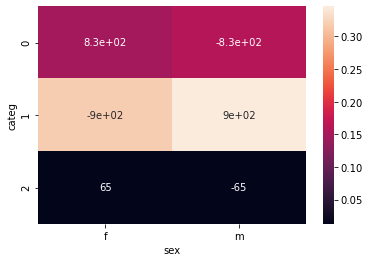

In [65]:
c = c.fillna(0) # on remplace les valeurs nulles par des 0
mesure = (c-indep)**2/indep
xi_n = mesure.sum().sum()
sns.heatmap(mesure/xi_n, annot=indep - c)
plt.show()

Conclusion : On voit que les livres de la catégorie 1 sont beaucoup plus choisies par les femmes que par les hommes. En revanche le genre du client n'influent pas sur le choix des livres de la catégorie 2.

## Lien entre l'âge des clients et le montant total des achats

In [66]:
orders_customers_age = pd.merge(orders_customers, customers, on='client_id', how='left')
orders_customers_age.head()

,client_id,total_price,sex,birth
0,c_1609,324033.35,m,1980
1,c_4958,289760.34,m,1999
2,c_6714,153660.84,f,1968
3,c_3454,113668.89,m,1969
4,c_3263,5276.87,f,1985


In [67]:
orders_customers_age['age'] = df.date.max().year-orders_customers_age['birth']
orders_customers_age.head()

,client_id,total_price,sex,birth,age
0,c_1609,324033.35,m,1980,43
1,c_4958,289760.34,m,1999,24
2,c_6714,153660.84,f,1968,55
3,c_3454,113668.89,m,1969,54
4,c_3263,5276.87,f,1985,38


_On supprime les outliers avant l'analyse_

In [68]:
orders_customers_age = orders_customers_age.drop(orders_customers_age[orders_customers_age.total_price > 100000].index)
orders_customers_age = orders_customers_age.drop(orders_customers_age[orders_customers_age.age < 20].index)

In [69]:
orders_customers_age.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8159 entries, 4 to 8599
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   client_id    8159 non-null   object 
 1   total_price  8159 non-null   float64
 2   sex          8159 non-null   object 
 3   birth        8159 non-null   int64  
 4   age          8159 non-null   int64  
dtypes: float64(1), int64(2), object(2)
memory usage: 382.5+ KB


Text(0, 0.5, 'Montant total des achats')

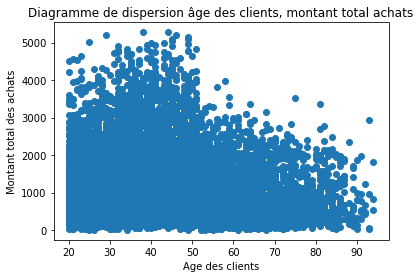

In [70]:
X = orders_customers_age['age']
y = orders_customers_age['total_price']
plt.scatter(X,y)
plt.title('Diagramme de dispersion âge des clients, montant total achats')
plt.xlabel('Age des clients')
plt.ylabel('Montant total des achats')

In [71]:
r, p_value = st.pearsonr(X, y)
print("Le coefficient de corrélation r est de : {}".format(r))
print("Sa p-value est de : {}".format(p_value))

Le coefficient de corrélation r est de : -0.19569402071043318
Sa p-value est de : 3.0720117579196022e-71


On trouve un coefficient de corrélation d'environ -0.20. Les variables sont donc corrélées négativement. Il s'agit d'une faible corrélation

Donc plus le client est âgé, plus le montant total de ses achats est suceptible d'être moins élevé.

La p-value est inférieur à 5%. r est significatif au seuil de 5%

In [72]:
 ## Calcul de la régression linéaire
X = orders_customers_age[['age']]
y = orders_customers_age['total_price']
X = X.assign(intercept = [1]*X.shape[0])
lr = sm.OLS(y, X).fit()
print(lr.summary2())

                  Results: Ordinary least squares
Model:              OLS              Adj. R-squared:     0.038      
Dependent Variable: total_price      AIC:                134790.0052
Date:               2021-06-23 09:53 BIC:                134804.0190
No. Observations:   8159             Log-Likelihood:     -67393.    
Df Model:           1                F-statistic:        324.8      
Df Residuals:       8157             Prob (F-statistic): 3.07e-71   
R-squared:          0.038            Scale:              8.7527e+05 
--------------------------------------------------------------------
                Coef.   Std.Err.    t     P>|t|    [0.025    0.975] 
--------------------------------------------------------------------
age            -11.4917   0.6376 -18.0228 0.0000  -12.7416  -10.2418
intercept     1800.4625  31.1768  57.7501 0.0000 1739.3480 1861.5769
--------------------------------------------------------------------
Omnibus:             1314.898       Durbin-Watson:   

In [73]:
lr.params

age           -11.491742
intercept    1800.462485
dtype: float64

In [74]:
a,b = lr.params['age'], lr.params['intercept']

Text(0, 0.5, 'Montant total des achats')

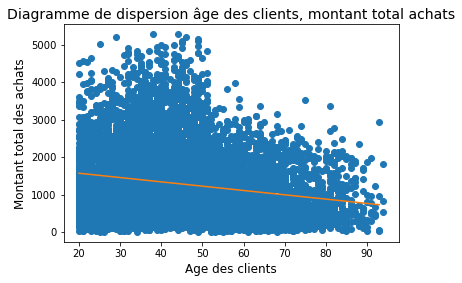

In [75]:
X = orders_customers_age['age']
y = orders_customers_age['total_price']
plt.plot(X, y,"o")
plt.plot(np.arange(min(X), max(X)),[a*x+b for x in np.arange(min(X), max(X))])
plt.title("Diagramme de dispersion âge des clients, montant total achats",fontsize=14)
plt.xlabel("Age des clients",fontsize=12)
plt.ylabel("Montant total des achats",fontsize=12)

## Lien entre l'âge des clients et la fréquence d'achats

In [76]:
customers_orders_frequency = orders.groupby(["client_id"], as_index=False).agg({'total_price':'sum', 'session_id':'count'})                       
customers_orders_frequency.head()

,client_id,total_price,session_id
0,c_1,558.18,33
1,c_10,1353.60,34
2,c_100,254.85,5
3,c_1000,2261.89,93
4,c_1001,1812.86,47


In [77]:
customers_orders_frequency= customers_orders_frequency.rename(columns = {'session_id':'frequency_orders'})
customers_orders_frequency.head()

,client_id,total_price,frequency_orders
0,c_1,558.18,33
1,c_10,1353.60,34
2,c_100,254.85,5
3,c_1000,2261.89,93
4,c_1001,1812.86,47


In [78]:
customers_orders_frequency = pd.merge(customers_orders_frequency, customers, on='client_id', how='left')
customers_orders_frequency.head()

,client_id,total_price,frequency_orders,sex,birth
0,c_1,558.18,33,m,1955
1,c_10,1353.60,34,m,1956
2,c_100,254.85,5,m,1992
3,c_1000,2261.89,93,f,1966
4,c_1001,1812.86,47,m,1982


In [79]:
customers_orders_frequency['age'] = df.date.max().year-customers_orders_frequency['birth']
customers_orders_frequency.head()

,client_id,total_price,frequency_orders,sex,birth,age
0,c_1,558.18,33,m,1955,68
1,c_10,1353.60,34,m,1956,67
2,c_100,254.85,5,m,1992,31
3,c_1000,2261.89,93,f,1966,57
4,c_1001,1812.86,47,m,1982,41


_On enlève les outliers avant l'analyse_

In [80]:
customers_orders_frequency = customers_orders_frequency.drop(customers_orders_frequency[customers_orders_frequency.total_price > 100000].index)
customers_orders_frequency = customers_orders_frequency.drop(customers_orders_frequency[customers_orders_frequency.age < 20].index)

In [81]:
customers_orders_frequency.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8159 entries, 0 to 8599
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   client_id         8159 non-null   object 
 1   total_price       8159 non-null   float64
 2   frequency_orders  8159 non-null   int64  
 3   sex               8159 non-null   object 
 4   birth             8159 non-null   int64  
 5   age               8159 non-null   int64  
dtypes: float64(1), int64(3), object(2)
memory usage: 446.2+ KB


Text(0, 0.5, "Fréquence d'achats")

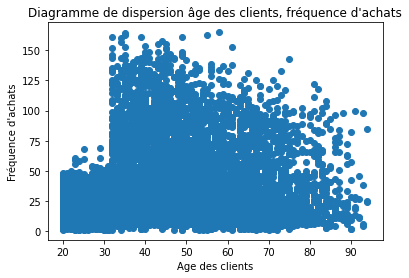

In [82]:
X = customers_orders_frequency['age']
y = customers_orders_frequency['frequency_orders']
plt.scatter(X,y)
plt.title("Diagramme de dispersion âge des clients, fréquence d'achats")
plt.xlabel("Age des clients")
plt.ylabel("Fréquence d'achats")

In [83]:
r, p_value = st.pearsonr(X, y)
print("Le coefficient de corrélation r est de : {}".format(r))
print("Sa p-value est de : {}".format(p_value))

Le coefficient de corrélation r est de : 0.12818190276055974
Sa p-value est de : 3.0933790436772863e-31


In [84]:
 ## Calcul de la régression linéaire
X = customers_orders_frequency[['age']]
y = customers_orders_frequency['frequency_orders']
X = X.assign(intercept = [1]*X.shape[0])
lr = sm.OLS(y, X).fit()
print(lr.summary2())

                  Results: Ordinary least squares
Model:              OLS              Adj. R-squared:     0.016     
Dependent Variable: frequency_orders AIC:                79221.8968
Date:               2021-06-23 09:53 BIC:                79235.9106
No. Observations:   8159             Log-Likelihood:     -39609.   
Df Model:           1                F-statistic:        136.3     
Df Residuals:       8157             Prob (F-statistic): 3.09e-31  
R-squared:          0.016            Scale:              964.52    
---------------------------------------------------------------------
             Coef.    Std.Err.      t      P>|t|     [0.025    0.975]
---------------------------------------------------------------------
age          0.2471     0.0212   11.6732   0.0000    0.2056    0.2886
intercept   26.6833     1.0349   25.7823   0.0000   24.6545   28.7120
-------------------------------------------------------------------
Omnibus:              1651.820      Durbin-Watson:      

In [85]:
a,b = lr.params['age'], lr.params['intercept']

Text(0, 0.5, "Fréquence d'achats")

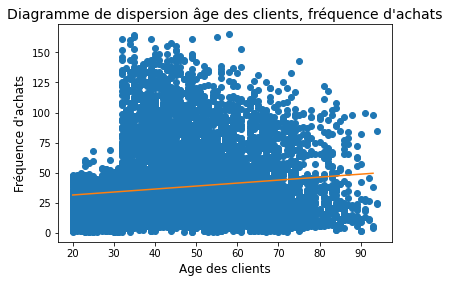

In [86]:
X = customers_orders_frequency['age']
y = customers_orders_frequency['frequency_orders']
plt.plot(X, y,"o")
plt.plot(np.arange(min(X), max(X)),[a*x+b for x in np.arange(min(X), max(X))])
plt.title("Diagramme de dispersion âge des clients, fréquence d'achats",fontsize=14)
plt.xlabel("Age des clients",fontsize=12)
plt.ylabel("Fréquence d'achats",fontsize=12)

## Lien entre l'âge du client et le prix du panier moyen

In [87]:
customers_panier_moyen =  orders.groupby(["client_id"], as_index=False).agg({'total_price':'mean'})
customers_panier_moyen = customers_panier_moyen.rename(columns = {'total_price':'panier_moyen'})
customers_panier_moyen.head()

,client_id,panier_moyen
0,c_1,16.914545
1,c_10,39.811765
2,c_100,50.970000
3,c_1000,24.321398
4,c_1001,38.571489


In [88]:
customers_panier_moyen.describe()

,panier_moyen
count,8600.000000
mean,40.382543
std,23.268341
min,4.150000
25%,25.367763
50%,32.052279
75%,48.534118
max,259.422500


In [89]:
customers_panier_moyen = pd.merge(customers_panier_moyen, customers, on='client_id', how='left')
customers_panier_moyen.head()

,client_id,panier_moyen,sex,birth
0,c_1,16.914545,m,1955
1,c_10,39.811765,m,1956
2,c_100,50.970000,m,1992
3,c_1000,24.321398,f,1966
4,c_1001,38.571489,m,1982


In [90]:
customers_panier_moyen['age'] = df.date.max().year-customers_panier_moyen['birth']
customers_panier_moyen.head()

,client_id,panier_moyen,sex,birth,age
0,c_1,16.914545,m,1955,68
1,c_10,39.811765,m,1956,67
2,c_100,50.970000,m,1992,31
3,c_1000,24.321398,f,1966,57
4,c_1001,38.571489,m,1982,41


_On enlève les outliers avant l'analyse_

In [91]:
customers_panier_moyen = customers_panier_moyen.drop(customers_panier_moyen[customers_panier_moyen.client_id == "c_1609"].index)
customers_panier_moyen = customers_panier_moyen.drop(customers_panier_moyen[customers_panier_moyen.client_id == "c_4958"].index)
customers_panier_moyen = customers_panier_moyen.drop(customers_panier_moyen[customers_panier_moyen.client_id == "c_6714"].index)
customers_panier_moyen = customers_panier_moyen.drop(customers_panier_moyen[customers_panier_moyen.client_id == "c_3454"].index)
customers_panier_moyen = customers_panier_moyen.drop(customers_panier_moyen[customers_panier_moyen.age < 20].index)

In [92]:
customers_panier_moyen.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8159 entries, 0 to 8599
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   client_id     8159 non-null   object 
 1   panier_moyen  8159 non-null   float64
 2   sex           8159 non-null   object 
 3   birth         8159 non-null   int64  
 4   age           8159 non-null   int64  
dtypes: float64(1), int64(2), object(2)
memory usage: 382.5+ KB


Text(0, 0.5, 'Prix du panier moyen')

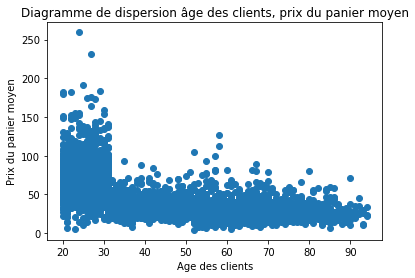

In [93]:
X = customers_panier_moyen['age']
y = customers_panier_moyen['panier_moyen']
plt.scatter(X,y)
plt.title("Diagramme de dispersion âge des clients, prix du panier moyen")
plt.xlabel("Age des clients")
plt.ylabel("Prix du panier moyen")

In [94]:
r, p_value = st.pearsonr(X, y)
print("Le coefficient de corrélation r est de : {}".format(r))
print("Sa p-value est de : {}".format(p_value))

Le coefficient de corrélation r est de : -0.5936525530250227
Sa p-value est de : 0.0


On trouve un coefficient de corrélation d'environ -0.59. Les variables sont donc fortement corrélées négativement.

Donc plus le client est âgé, moins la taille de son panier est susceptible d'être grand.

La p-value est inférieur à 5%. r est significatif au seuil de 5%

In [95]:
 ## Calcul de la régression linéaire
X = customers_panier_moyen[['age']]
y = customers_panier_moyen['panier_moyen']
X = X.assign(intercept = [1]*X.shape[0])
lr = sm.OLS(y, X).fit()
print(lr.summary2())

                  Results: Ordinary least squares
Model:              OLS              Adj. R-squared:     0.352     
Dependent Variable: panier_moyen     AIC:                70183.4545
Date:               2021-06-23 09:53 BIC:                70197.4682
No. Observations:   8159             Log-Likelihood:     -35090.   
Df Model:           1                F-statistic:        4439.     
Df Residuals:       8157             Prob (F-statistic): 0.00      
R-squared:          0.352            Scale:              318.57    
--------------------------------------------------------------------
                Coef.   Std.Err.     t      P>|t|    [0.025   0.975]
--------------------------------------------------------------------
age            -0.8105    0.0122  -66.6273  0.0000  -0.8343  -0.7866
intercept      76.2149    0.5948  128.1374  0.0000  75.0490  77.3808
-------------------------------------------------------------------
Omnibus:             3727.119      Durbin-Watson:         1.9

In [96]:
a,b = lr.params['age'], lr.params['intercept']

Text(0, 0.5, 'Prix du panier moyen')

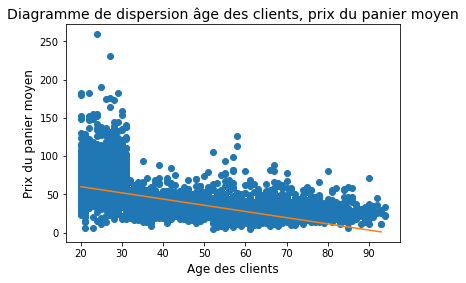

In [97]:
X = customers_panier_moyen['age']
y = customers_panier_moyen['panier_moyen']
plt.plot(X, y,"o")
plt.plot(np.arange(min(X), max(X)),[a*x+b for x in np.arange(min(X), max(X))])
plt.title("Diagramme de dispersion âge des clients, prix du panier moyen",fontsize=14)
plt.xlabel("Age des clients",fontsize=12)
plt.ylabel("Prix du panier moyen",fontsize=12)

## Lien entre l'âge du client et les catégories des livres achetés

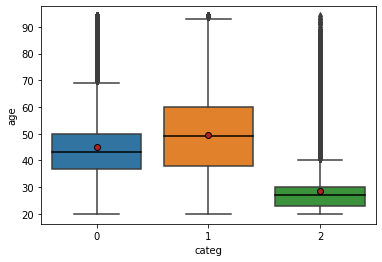

In [98]:
X = 'age'
Y = 'categ'
medianprops = {'color':"black"}
meanprops = {'marker':'o', 'markeredgecolor':'black',
 'markerfacecolor':'firebrick'}

sns.boxplot(y=df[X], x=df[Y], showmeans=True, meanprops=meanprops,
medianprops=medianprops);
plt.show()

In [99]:
df.groupby(Y)[X].mean()

categ
0    45.024128
1    49.627787
2    28.750000
Name: age, dtype: float64

In [100]:
moyenne_globale = df[X].mean()
print("La moyenne globale est de {}".format(moyenne_globale))

La moyenne globale est de 45.85729993198821


In [101]:
linear_model = ols('age ~ C(categ)',data=df).fit()
table = sm.stats.anova_lm(linear_model, typ=2)
# Afficher les résultats de la table d'ANOVA
print(table)

                sum_sq        df             F  PR(>F)
C(categ)  1.105799e+07       2.0  34283.908416     0.0
Residual  9.959069e+07  617537.0           NaN     NaN


In [102]:
pvalue = linear_model.f_pvalue
print("Ici la p-value est égale à {}".format(pvalue))

Ici la p-value est égale à 0.0


La p-value étant inférieur à 5%, on peut conclure qu'il existe une corrélation entre l'âge du client et la catégorie de livres achetés

# Analyse des corrélations par catégories d'âge

## Lien entre la catégorie d'âge des clients et le montant total des achats

In [103]:
orders_customers_age['bins_age'] = pd.cut(x=orders_customers_age['age'], bins=[18, 32, 52, 100])
orders_customers_age.head()

,client_id,total_price,sex,birth,age,bins_age
4,c_3263,5276.87,f,1985,38,"(32, 52]"
5,c_1570,5271.62,f,1979,44,"(32, 52]"
6,c_2899,5214.05,f,1994,29,"(18, 32]"
7,c_2140,5208.82,f,1977,46,"(32, 52]"
8,c_7319,5155.77,f,1974,49,"(32, 52]"


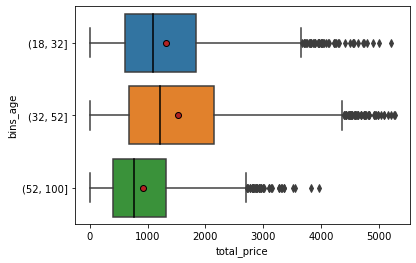

In [104]:
X = "bins_age"
Y = "total_price"
medianprops = {'color':"black"}
meanprops = {'marker':'o', 'markeredgecolor':'black',
 'markerfacecolor':'firebrick'}

sns.boxplot(y=orders_customers_age[X], x=orders_customers_age[Y], showmeans=True, meanprops=meanprops,
medianprops=medianprops);
plt.show()

In [105]:
orders_customers_age.groupby(X)[Y].mean()

bins_age
(18, 32]     1327.457746
(32, 52]     1521.681707
(52, 100]     927.483898
Name: total_price, dtype: float64

In [106]:
moyenne_globale = orders_customers_age[Y].mean()
print("La moyenne globale est de {}".format(moyenne_globale))

La moyenne globale est de 1270.4831829881023


In [107]:
linear_model = ols('total_price ~ C(bins_age)',data=orders_customers_age).fit()
table = sm.stats.anova_lm(linear_model, typ=2)
# Afficher les résultats de la table d'ANOVA
print(table)

                   sum_sq      df           F         PR(>F)
C(bins_age)  5.496377e+08     2.0  326.061665  5.883551e-137
Residual     6.874229e+09  8156.0         NaN            NaN


In [108]:
pvalue = linear_model.f_pvalue
print("Ici la p-value est égale à {}".format(pvalue))

Ici la p-value est égale à 5.883551461386103e-137


La p-value étant inférieur à 5%, on peut conclure qu'il existe une corrélation entre la catégorie d'âge d'un client et la catégorie de livres achetés

## Lien entre la catégorie d'âge des clients et la fréquence d'achats 

In [109]:
customers_orders_frequency['bins_age'] = pd.cut(x=customers_orders_frequency['age'], bins=[18, 32, 52, 100])
customers_orders_frequency.head()

,client_id,total_price,frequency_orders,sex,birth,age,bins_age
0,c_1,558.18,33,m,1955,68,"(52, 100]"
1,c_10,1353.60,34,m,1956,67,"(52, 100]"
2,c_100,254.85,5,m,1992,31,"(18, 32]"
3,c_1000,2261.89,93,f,1966,57,"(52, 100]"
4,c_1001,1812.86,47,m,1982,41,"(32, 52]"


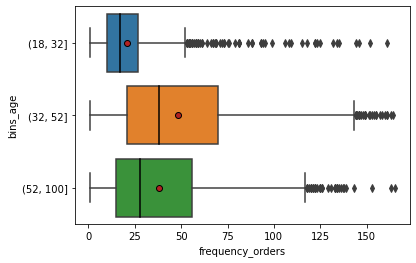

In [110]:
X = "bins_age"
Y = "frequency_orders"
medianprops = {'color':"black"}
meanprops = {'marker':'o', 'markeredgecolor':'black',
 'markerfacecolor':'firebrick'}

sns.boxplot(y=customers_orders_frequency[X], x=customers_orders_frequency[Y], showmeans=True, meanprops=meanprops,
medianprops=medianprops);
plt.show()

In [111]:
customers_orders_frequency.groupby(X)[Y].mean()

bins_age
(18, 32]     20.680851
(32, 52]     48.220645
(52, 100]    38.096291
Name: frequency_orders, dtype: float64

In [112]:
moyenne_globale = customers_orders_frequency[Y].mean()
print("La moyenne globale est de {}".format(moyenne_globale))

La moyenne globale est de 38.07819585733546


In [113]:
linear_model = ols('frequency_orders ~ C(bins_age)',data=customers_orders_frequency).fit()
table = sm.stats.anova_lm(linear_model, typ=2)
# Afficher les résultats de la table d'ANOVA
print(table)

                   sum_sq      df           F         PR(>F)
C(bins_age)  9.452678e+05     2.0  546.487852  1.880326e-223
Residual     7.053774e+06  8156.0         NaN            NaN


In [114]:
pvalue = linear_model.f_pvalue
print("Ici la p-value est égale à {}".format(pvalue))

Ici la p-value est égale à 1.8803262313201476e-223


La p-value étant inférieur à 5%, on peut conclure qu'il existe une corrélation entre la catégorie d'âge d'un client et la fréquence d'achats

## Lien entre la catégorie d'âge du client et la prix du panier moyen

In [115]:
customers_panier_moyen['bins_age'] = pd.cut(x=customers_panier_moyen['age'], bins=[18, 32, 52, 100])
customers_panier_moyen.head()

,client_id,panier_moyen,sex,birth,age,bins_age
0,c_1,16.914545,m,1955,68,"(52, 100]"
1,c_10,39.811765,m,1956,67,"(52, 100]"
2,c_100,50.970000,m,1992,31,"(18, 32]"
3,c_1000,24.321398,f,1966,57,"(52, 100]"
4,c_1001,38.571489,m,1982,41,"(32, 52]"


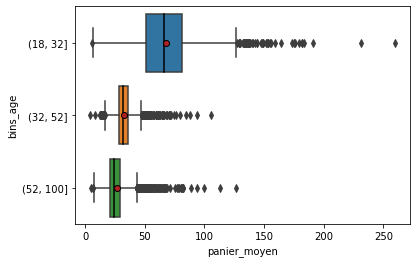

In [116]:
X = "bins_age"
Y = "panier_moyen"
medianprops = {'color':"black"}
meanprops = {'marker':'o', 'markeredgecolor':'black',
 'markerfacecolor':'firebrick'}

sns.boxplot(y=customers_panier_moyen[X], x=customers_panier_moyen[Y], showmeans=True, meanprops=meanprops,
medianprops=medianprops);
plt.show()

In [117]:
customers_panier_moyen.groupby(X)[Y].mean()

bins_age
(18, 32]     67.637643
(32, 52]     32.473189
(52, 100]    26.233233
Name: panier_moyen, dtype: float64

In [118]:
moyenne_globale = customers_panier_moyen[Y].mean()
print("La moyenne globale est de {}".format(moyenne_globale))

La moyenne globale est de 38.83644402470963


In [119]:
linear_model = ols('panier_moyen ~ C(bins_age)',data=customers_panier_moyen).fit()
table = sm.stats.anova_lm(linear_model, typ=2)
# Afficher les résultats de la table d'ANOVA
print(table)

                   sum_sq      df            F  PR(>F)
C(bins_age)  2.219741e+06     2.0  5048.463332     0.0
Residual     1.793041e+06  8156.0          NaN     NaN


In [120]:
pvalue = linear_model.f_pvalue
print("Ici la p-value est égale à {}".format(pvalue))

Ici la p-value est égale à 0.0


La p-value étant inférieur à 5%, on peut conclure qu'il existe une corrélation entre la catégorie d'âge d'un client et la fréquence d'achats

## Probabilité qu'un client achète la référence 0_525 sachant qu'il a acheté la réference 2_159

#### On calcule tout d'abord la proba d'acheter le livre 2_159

In [121]:
(df['id_prod'] == '2_159').sum()

585

In [122]:
proba2_159 = (df['id_prod'] == '2_159').sum()/(df.shape[0])
print("La probabilité d'acheter le livre 2_159 est de {}".format(proba2_159))

La probabilité d'acheter le livre 2_159 est de 0.0009473070570327428


#### On calcule ensuite la proba d'acheter le livre 2_159 et le livre 0_525 (inter)

In [123]:
df_proba = df[(df['id_prod'] == '2_159') | (df['id_prod'] == '0_525')]
df_proba.head()

,id_prod,price,categ,client_id,sex,birth,date,session_id,age
284143,2_159,145.99,2,c_4410,f,1967,2021-12-01 07:36:25.671688,s_127714,56
284144,2_159,145.99,2,c_4389,m,1984,2022-02-26 04:43:31.110005,s_171008,39
284145,2_159,145.99,2,c_5019,f,1977,2021-12-17 03:00:10.554987,s_135533,46
284146,2_159,145.99,2,c_5633,f,1986,2022-04-18 15:33:53.341350,s_195917,37
284147,2_159,145.99,2,c_3424,m,2003,2022-05-24 18:34:20.048378,s_213433,20


In [124]:
df_proba.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1051 entries, 284143 to 515762
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   id_prod     1051 non-null   object        
 1   price       1051 non-null   float64       
 2   categ       1051 non-null   int64         
 3   client_id   1051 non-null   object        
 4   sex         1051 non-null   object        
 5   birth       1051 non-null   int64         
 6   date        1051 non-null   datetime64[ns]
 7   session_id  1051 non-null   object        
 8   age         1051 non-null   int64         
dtypes: datetime64[ns](1), float64(1), int64(3), object(4)
memory usage: 82.1+ KB


In [125]:
df_proba = df_proba.groupby(['client_id']).agg({'id_prod' : pd.Series.nunique})

In [126]:
df_proba.head()

,id_prod
client_id,
c_1025,2
c_1028,2
c_1050,2
c_1063,2
c_1077,2


In [127]:
(df_proba['id_prod'] == 2).sum()

441

In [128]:
proba_inter = (df_proba['id_prod'] == 2).sum()/df.shape[0]
print(proba_inter)

0.0007141237814554523


In [129]:
proba_final = proba_inter/proba2_159
print(proba_final)

0.7538461538461539
